# Kalman Filter: Circular track

In [1]:
%pylab --no-import-all
from __future__ import division, print_function, generators
import  numpy as np
import kalman as k

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [ ]:
# %load kalman.py

import numpy as np
import matplotlib.pyplot as plt



def kalman_predict( A, # transition matrix 
            r, # measurement error matrix
            H, # transformation matrix from state vector to measurement
            p, # initial variance on prediction
            xkal, # estimated state vector
            xpredict, # predicted state vector
            xmeas): # measurements
    for i in range(1, xkal.shape[1]): # for each measurement do 
        # prediction: recursive formula
        xpredict[:, i] = np.dot(A, xkal[:, i - 1])
        # predict covariance  
        p = A*p*A.T
        # construct kalman gain matrix according to prediction equations
        # higher gain leads to higher influence of measurement,
        # lower gain to higher influence of predicion
        K = np.dot(p*H.T, np.linalg.inv(H*p*H.T + r))
        # construct estimate from prediction and gain 
        xkal[:, i] = xpredict[:, i] + K*(xmeas[:, i] - H*xpredict[:, i])
        # update covariance with gain
        p = (np.identity(K.shape[0]) - K * H) * p
    return xkal, xpredict

def plot_results(xkal, xpredict, xmeas, xtrue):
    fig1 = plt.figure()
    ax1 = plt.axes()
    plt.plot(xtrue, 'b-', label = 'True')
    plt.plot(xmeas[0].T, 'rx', label = 'Measurement')
    plt.plot(xpredict[0].T, 'g.',  label = 'Prediction')
    plt.plot(xkal[0].T, 'ko', label = 'Kalman')
    plt.xlabel('Iteration')
    plt.ylabel('X')

    fig2 = plt.figure()
    ax2 = plt.axes()
    #plt.axhline(v)
    plt.axhline(np.mean(xmeas[1]))
    plt.plot(xpredict[1].T, 'g.',  label = 'Prediction')
    plt.plot(xmeas[1].T, 'rx', label = 'Measurement')
    plt.plot(xkal[1].T, 'ko', label = 'Kalman')
    plt.xlabel('Iteration')
    plt.ylabel('Velocity')
    return [[fig1, fig2], [ax1, ax2]]


## Global parametrization
For simplicity take only radius of circle and some transposition of the origin along x-axis

In [11]:
dt = 0.2
# final time for track
T = 2* np.pi
# number of measurements
N = int(T / dt)
# initial position
x0 = 100
# position, velocity and acceleration
state_vec_dim = 2
# parabola with some curvature g 

# initial velocity / slope

# errors
sigma_pos = 5e-2
sigma_vel = 2
sigma_acc = 2

_t = np.linspace(0, T, N)

xtrue5  = np.matrix([np.cos(_t), np.sin(_t)])

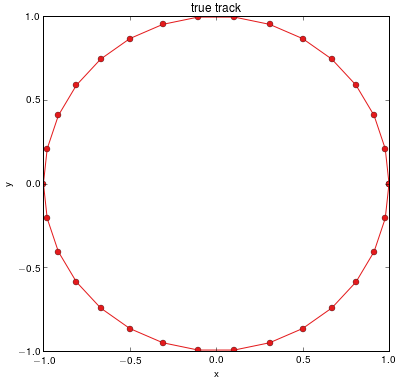

In [12]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
plt.plot(xtrue5[0].T, xtrue5[1].T, marker='o')
plt.title('true track')
plt.xlabel('x')
plt.ylabel('y')

[[-0.01282116  0.00385782 -0.11291334  0.01343879 -0.05923763  0.05295829  0.01914449 -0.02324903 -0.02898462 -0.06693767 -0.12141843
   0.01379277 -0.0222652  -0.08302272  0.05347262 -0.05772489  0.01824422  0.00644814 -0.0045146   0.05864614  0.04727607  0.02968315
   0.01052832  0.04989527 -0.05474108  0.04615936 -0.00948958  0.0452567   0.02754501 -0.04067632  0.02084451]
 [-0.05577353  0.10258571  0.02342902 -0.04878162  0.01722768  0.07995411  0.07020004 -0.0019743   0.0084293   0.00292858 -0.08900512
  -0.03175834 -0.03381359 -0.0345302   0.0409964   0.01509011  0.11899093 -0.0130336  -0.0281497   0.0119734  -0.02914381 -0.07981381
   0.06410857  0.08654757 -0.02080442 -0.05131344 -0.04982181 -0.06054845  0.04052883 -0.0575689  -0.0723237 ]]


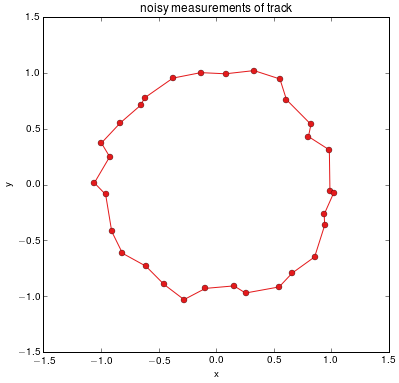

In [16]:
# add noise
measurement_noise = np.random.normal(loc=0, scale=sigma_pos, size=xtrue5.shape)
print(measurement_noise)
xmeas4 = xtrue5 + measurement_noise
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
plt.plot(xmeas4[0].T, xmeas4[1].T, marker='o')
plt.title('noisy measurements of track')
plt.xlabel('x')
plt.ylabel('y')

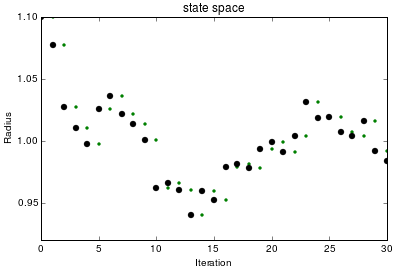

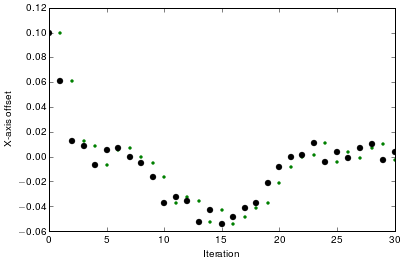

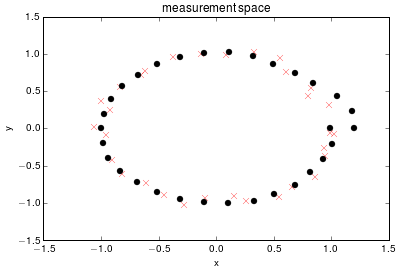

In [18]:

# evaluate non-linear track model (more expensive than linear expansion!)
def h_k(p_k, k):
    """
    Kalman filter auxiliary function: Map state vector p_k at surface k
    to measurement space. In this simple example the cartesian coordinates
    of a circular motion with given radius and origin offset are evaluated.
    
    Parameters
    ----------
    
    p_k: array-like
            state vector parametrizing the track
    k:   integer
            float
    
    Returns
    -------
    
    m_k: array
            measurement at surface k
    """
    return np.array([[ p_k[0, 0] *  np.cos(k) + p_k[1, 0], # x coordinate of point 
    #on circle  with radius p_k[0] and x_axis offset p_k[1]
                      p_k[0, 0] * np.sin(k)]]).T # y_coordinate


xpredict4 = np.matrix (np.linspace(0,T,N*state_vec_dim).reshape((state_vec_dim, N)))
xkal4 = np.matrix (np.linspace(0,T,N*state_vec_dim).reshape((state_vec_dim, N)))
# initial position -- deliberately slightly off the real values radius=1, x-offset=0
xpredict4[:,0] = xkal4[:,0] = np.array([[1.1], [0.1]]) # np.array ( [[xmeas4[0,0]   ], [xmeas4[1,0]] ] )
# initial variance on prediction
p4 = 0.5 *  np.matrix ( [[2, 0],
                  [0, 2]] )
# measurement error
r4 = 1e-1  * np.matrix([[sigma_pos, 0],
                [0, sigma_pos]])
# prediction matrix
# global track parameters do not change in this example
A5 = np.matrix ( [[1, 0],
                [0, 1]] )
# approx. Jacobian of h_k
H4 = 1e-3 *  np.matrix ([[1, 1],
                 [1, 0]] )
for i in range(1,N):
    # prediction: recursive formula
    xpredict4[:,i] = np.dot(A5, xkal4[:,i-1] )
    p4 = A5*p4*A5.T
    K4 = p4*H4.T * np.linalg.inv(H4*p4*H4.T+r4)
    _resid = (np.matrix(xmeas4[:,i]) - h_k(xpredict4[:,i], _t[i]))
    xkal4[:,i] = xpredict4[:,i] + K4 * _resid 
    p4 = (np.identity(state_vec_dim)-K4 * H4) * p4
    
fig1 = plt.figure()
ax1 = plt.axes()
plt.title('state space')
plt.plot(xpredict4[0].T, 'g.',  label = 'Prediction')
plt.plot(xkal4[0].T, 'ko', label = 'Kalman')
plt.xlabel('Iteration')
plt.ylabel('Radius')
fig2 = plt.figure()
ax2 = plt.axes()
#plt.plot(xmeas4[1].T, 'rx', label = 'Measurement')
plt.plot(xpredict4[1].T, 'g.',  label = 'Prediction')
plt.plot(xkal4[1].T, 'ko', label = 'Kalman')
plt.xlabel('Iteration')
plt.ylabel('X-axis offset')



plt.figure()
ax = plt.axes
plt.plot(xmeas4[0].T, xmeas4[1].T, 'rx', label='Measurement')
for i in range(N):
    _plot_data =h_k(xpredict4[:, i], _t[i])
    plt.plot(_plot_data[0], _plot_data[1], 'ko')
plt.title('measurement space')
plt.xlabel('x')
plt.ylabel('y')